# Исследуемый датасет: https://www.kaggle.com/datasets/arunjathari/bostonhousepricedata

# Краткое описание датасета:
Предметная область:
Этот набор данных содержит информацию, собранную Службой переписи населения США, о жилье в районе Бостона, штат Массачусетс.
Источник данных:
Датасет был получен из архива StatLib. Данные были первоначально опубликованы Харрисоном Д. и Рубинфельдом Д. Л. в статье «Гедонистические цены и спрос на чистый воздух», J. Environ. Economics & Management, том 5, стр. 81–102, 1978.
Характер данных:
Реальные данные. Каждая строка представляет набор данных о жилье.

Атрибуты (все числовые, непрерывные):

CRIM - уровень преступности на душу населения в разбивке по городам;

ZN - доля жилой земли, разделенной на участки площадью более 25 000 кв. футов;

INDUS - доля гектаров, не связанных с розничной торговлей, в расчете на один город;

CHAS - фиктивная переменная Чарльз-Ривер (= 1, если тракт граничит с рекой; 0 в противном случае);

NOX - концентрация оксидов азота (частей на 10 миллионов);

RM - среднее количество комнат в жилом помещении;

AGE - доля квартир, занимаемых владельцами, построенных до 1940 года;

DIS - взвешенные расстояния до пяти бостонских центров занятости;

RAD - показатель доступности к радиальным магистралям;

TAX - ставка налога на недвижимость по полной стоимости за 10 000 долларов США;

PTRATIO - соотношение числа учеников и учителей в разбивке по городам;

B - 1000(Bk - 0,63)^2, где Bk - доля чернокожих в населенном пункте;

LSTAT - % более низкого статуса населения;

MEDV - средняя стоимость домов, занимаемых владельцами, в 1000 долларов;

Задача анализа: прогнозирование цен на жилье в Бостоне

In [11]:
# Загрузка датасета
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "arunjathari/bostonhousepricedata",
    "Boston-house-price-data.csv"
)

print("\nПервые 5 записей:")
df.head()

Using Colab cache for faster access to the 'bostonhousepricedata' dataset.

Первые 5 записей:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
# Проверка пропущенных значений
print("Пропущенные значения по столбцам:")
print(df.isnull().sum())

Пропущенные значения по столбцам:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


В исследуемом датасете пропусков нет.

Варианты обработки пропущенных значений:

- Замена средним значением (среднее арифметическое)
- Замена медианой (устойчиво к выбросам)
- Интерполяция соседних значений
- Удаление строк/столбцов при большом количестве пропусков

In [13]:
# Среднее значение и СКО
print("\nСреднее значение и СКО по каждому атрибуту:")
stats = df.describe().loc[['mean', 'std']]
display(stats.T)


Среднее значение и СКО по каждому атрибуту:


,mean,std
CRIM,3.613524,8.601545
ZN,11.363636,23.322453
INDUS,11.136779,6.860353
CHAS,0.069170,0.253994
NOX,0.554695,0.115878
RM,6.284634,0.702617
AGE,68.574901,28.148861
DIS,3.795043,2.105710
RAD,9.549407,8.707259
TAX,408.237154,168.537116


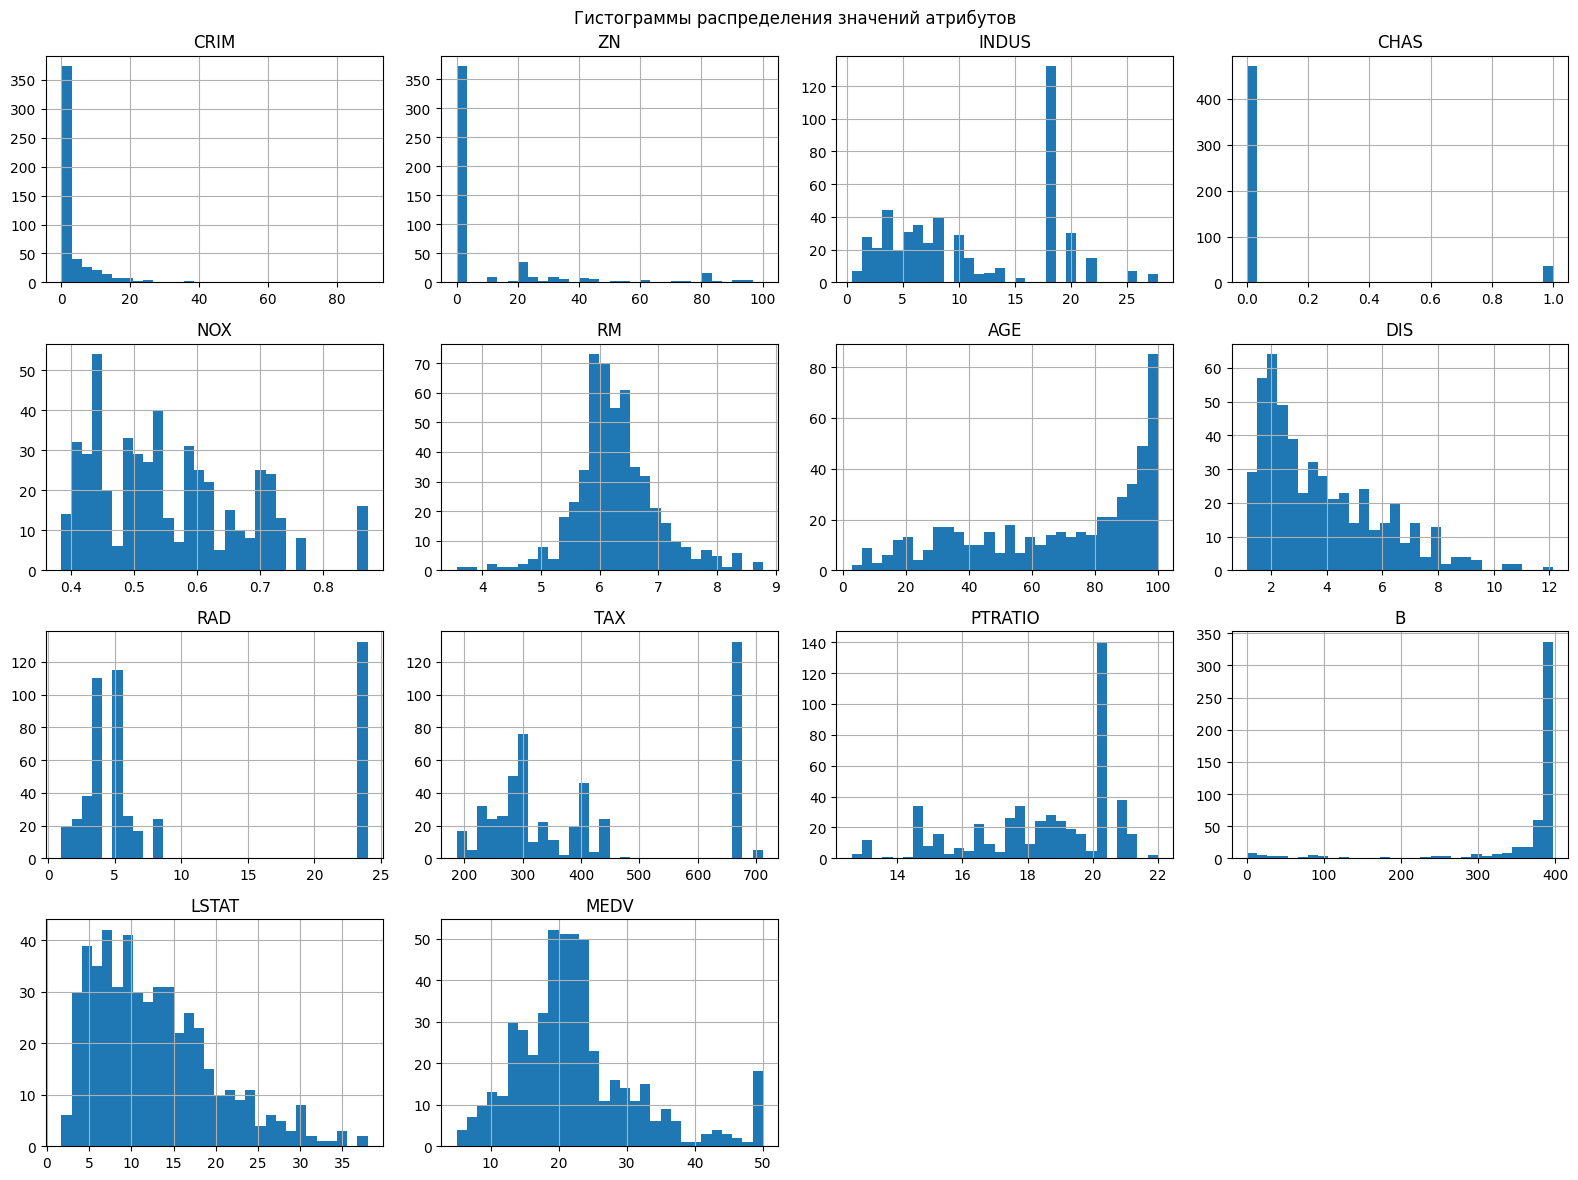

In [14]:
# Гистограммы распределения значений
df.hist(bins=30, figsize=(16, 12))
plt.suptitle("Гистограммы распределения значений атрибутов")
plt.tight_layout()
plt.show()

# Определение выбросов

Выбросы можно определять по длинным "хвостам" справа или слева от основного распеределения.

У CRIM большинство значений сконцентрировано у 0, вправо идет "хвост". Также "хвосты" вправо идут у ZN, DIS и LSTAT; влево у B и AGE; и вправо, и влево у RM.

Остальные атрибуты более стабильны, а у CHAS выбросы отсутствуют, так как атрибут принимает значения 0 или 1.

In [15]:
# Вычислим корреляционную матрицу
corr_matrix = df.corr()
print("Корреляционная матрица:")
corr_matrix

Корреляционная матрица:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


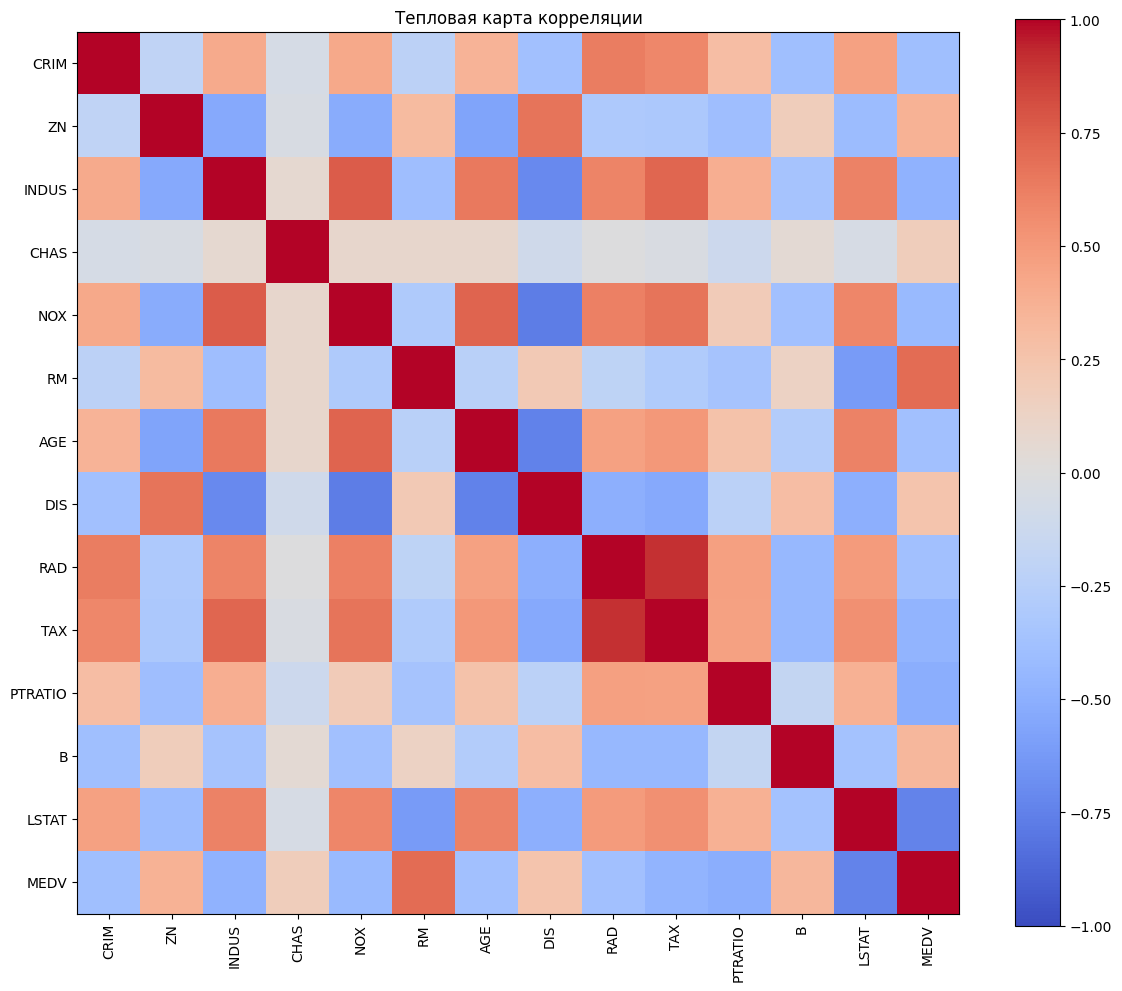

In [16]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Тепловая карта корреляции")
plt.tight_layout()
plt.show()

# Проанализируем корреляцию:

Высококоррелированными атрибутами являются TAX, RAD, INDUS, NOX, LSTAT.

Очень слабо коррелируемым атрибутом являет CHAS.

Рассмотрим сильнокоррелируемые пары атрибутов и характер их корреляции:

Очень высокое значение положительной корреляции между параметрами RAD и TAX. Также сильная положительная корреляция наблюдается между параметрами CRIM-RAD; ZN-DIS; INDUS-NOX; INDUS-TAX; INDUS-AGE; INDUS-LSTAT; NOX-AGE; NOX-RAD; NOX-TAX; NOX-LSTAT; RM-MEDV; AGE-LSTAT; TAX-LSTAT.

Высокие значения отрицательной корреляции видны у пар: INDUS-DIS; NOX-DIS; RM-LSTAT; AGE-DIS; LSTAT-MEDV.

Из результатов видно, что положительная корреляция выражена более сильно, чем отрицательная.

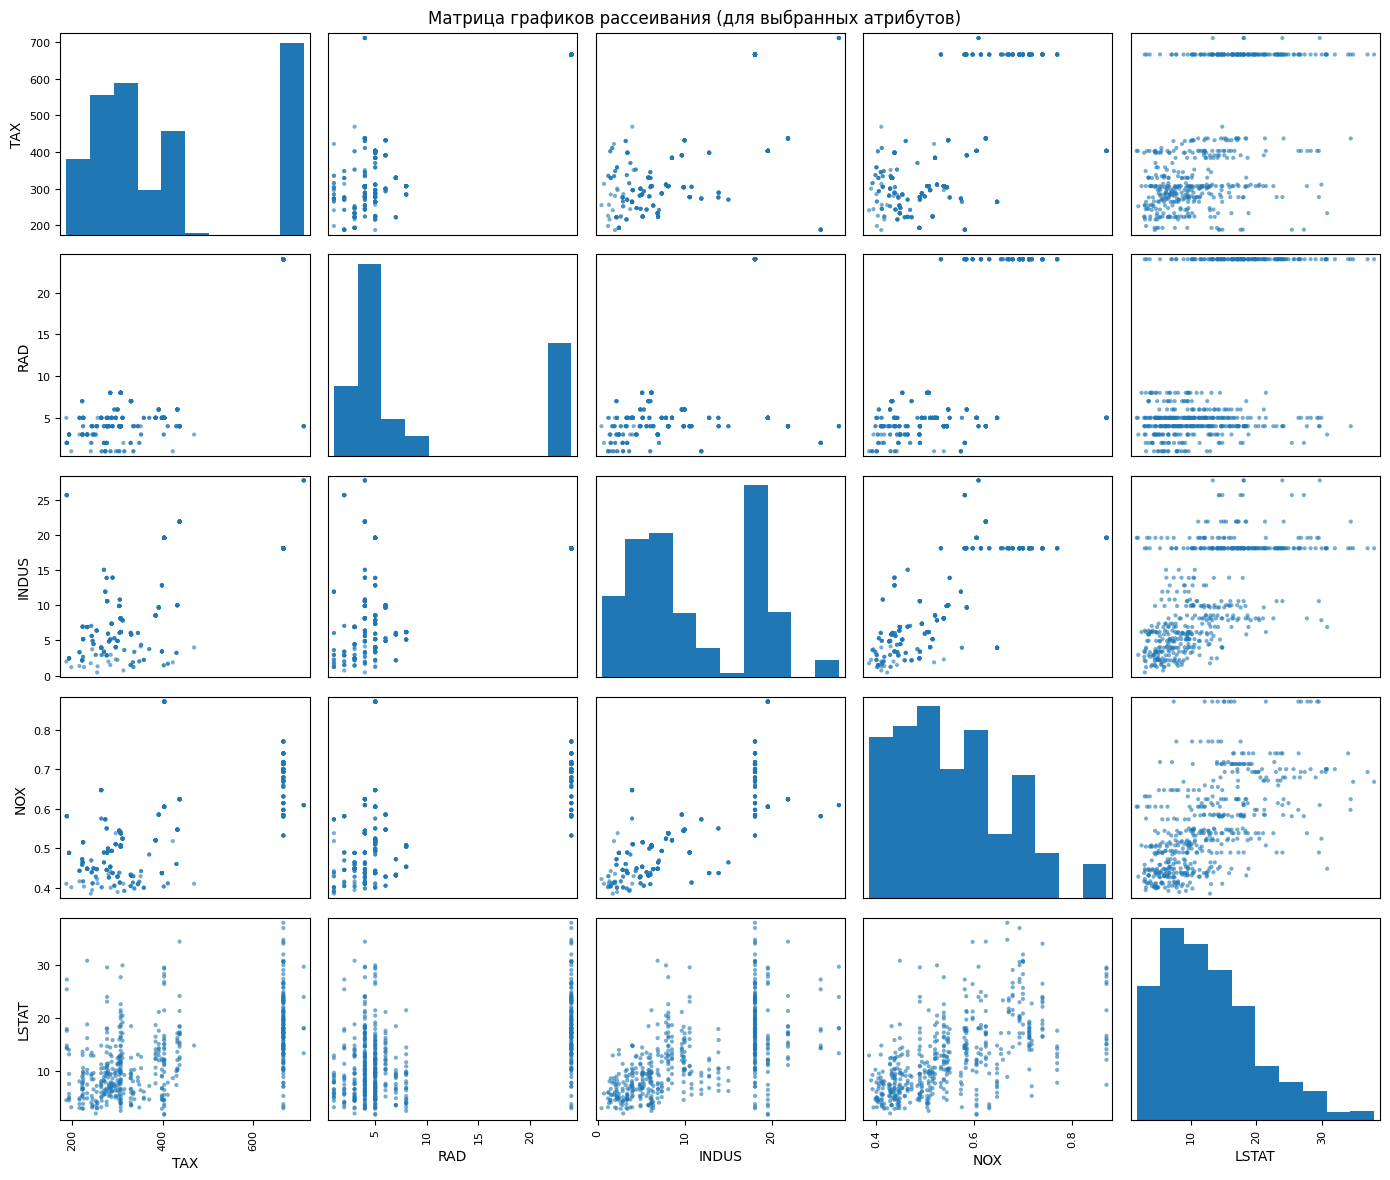

In [17]:
# Постоение матрицы графиков рассеивания для некоторых атрибутов
selected_cols = ['TAX', 'RAD', 'INDUS', 'NOX', 'LSTAT']
pd.plotting.scatter_matrix(df[selected_cols], alpha=0.6, figsize=(14, 12), diagonal='hist')
plt.suptitle("Матрица графиков рассеивания (для выбранных атрибутов)")
plt.tight_layout()
plt.show()

# Анализ полученных результатов:

Матрица графиков рассеивания, построенная для набора признаков (INDUS, NOX, RAD, TAX, LSTAT), наглядно демонстрирует взаимосвязи между ними. Эти визуальные наблюдения не только подтверждают результаты корреляционного анализа, но и углубляют понимание характера зависимостей, что помогает выделить наиболее информативные признаки для прогнозирования цен на жилье в Бостоне.